In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
s = pd.Series([1,2,3,4,5, np.nan, 6, 7])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    NaN
6    6.0
7    7.0
dtype: float64

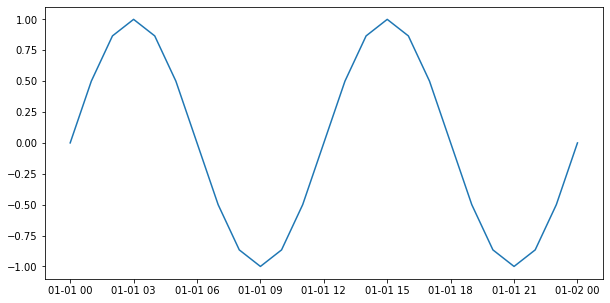

In [93]:
# creating a date range with some frequency
plt.figure(figsize=(10, 5))
dates = pd.date_range("20130101", end="20130102", freq="1H")
df3 = pd.Series(np.sin(np.linspace(-2 * np.pi, 2 * np.pi, 25)), index=dates)
lp = sns.lineplot(data=df3)


In [25]:
df = pd.DataFrame(np.random.randn(25, 4), index=dates, columns=['HP', 'Attack', 'Speed', 'Defense'])
df.index.name = 'Date'

<AxesSubplot:xlabel='Date', ylabel='HP'>

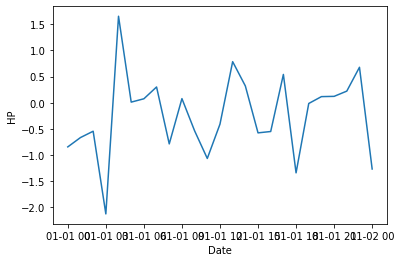

In [30]:
sns.lineplot(data=df, y="HP", x="Date")

In [96]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [36]:
df2.dtypes # check the types of a dataframe
df2.to_numpy() # turn to numpy representation (might be expensive)

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.
Might be expensive
Does not contain the index column

In [39]:
df.info()
df.describe() # short statistical summary

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2013-01-01 00:00:00 to 2013-01-02 00:00:00
Freq: H
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HP       25 non-null     float64
 1   Attack   25 non-null     float64
 2   Speed    25 non-null     float64
 3   Defense  25 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


,HP,Attack,Speed,Defense
count,25.000000,25.000000,25.000000,25.000000
mean,-0.232844,-0.140479,0.145599,0.281667
std,0.796162,1.040909,1.035236,0.937862
min,-2.123377,-1.848984,-1.787923,-1.526980
25%,-0.665187,-1.113944,-0.678559,-0.363067
50%,-0.014579,-0.074692,0.156374,-0.081943
75%,0.221577,0.342074,0.718963,1.069517
max,1.651186,2.008655,2.918841,2.513384


In [97]:
df.T # transposes the data
df.sort_index(axis=1, ascending=False) # sorts by column names or index
df.sort_values(by="Speed", ascending=False) # sort by fastest

,HP,Attack,Speed,Defense
Date,,,,
2013-01-01 00:00:00,-0.843507,-0.243235,2.918841,0.314175
2013-01-01 11:00:00,-1.064385,0.342074,1.612435,-0.273593
2013-01-01 21:00:00,0.121463,-0.415207,1.396188,0.654426
2013-01-01 22:00:00,0.221577,-1.113944,0.921417,-0.661926
2013-01-01 13:00:00,0.783938,2.008655,0.802785,0.996621
2013-01-01 17:00:00,0.539917,-0.026517,0.769815,-0.286458
2013-01-01 02:00:00,-0.544453,0.335085,0.718963,1.202331
2013-01-01 12:00:00,-0.409212,-0.716585,0.717059,-1.526980
2013-01-01 18:00:00,-1.339187,1.596837,0.529270,-0.490137


While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

### Selection of data

In [149]:

df.HP
df[0:3] # get from first to third row
df['20130101 01':'20130101 07'] # iterate through hours
df.loc[dates[0]] # selection by a particular date
df.loc[:, ['HP', 'Speed']] # selection by columns
df.loc['20130101 01':'20130101 07', ['HP', 'Attack']] # both techniques
df.loc['20130101 08', ['HP', 'Speed']] # dimension reduction
df.loc[dates[0], 'HP'] # getting singular value
# For getting fast access to a scalar (equivalent to the prior method):
df.at['20130101 08', 'HP'] # like iat by taking strings
df.iloc[5] # selection by position
df.iloc[3:5, 0:2] # third to fifth row, 0 to 2 columns
df.iloc[[1, 3, 5], [0,3]] # access rows and columns by their indices
df.iloc[1:3, :] # all columns
df.iloc[1, 1] # explicit value taking
df.iat[1, 1] # scalar extraction faster than the previous method (index at)
df[df['HP'].isin([0.011378])]
df2['E'] = ['one', 'one', 'two', 'three']
df2[df2['E'].isin(['one', 'two'])] # filter those whose column is in a list of values

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,one,foo
1,1.0,2013-01-02,1.0,3,one,foo
2,1.0,2013-01-02,1.0,3,two,foo


### Setting data

In [163]:
s1 = pd.Series(data=range(25), index=dates)

In [191]:
# Adding new columns
df['K'] = s1
df['F'] = s1 + np.random.randn(25)
# df[df.Attack > df.Attack.mean()]['F'] = 'Strong'
df3 = df.copy()
strong_mask = df3['Attack'] > df3['HP'].mean() # filter to by given to a query
df3['H'] = np.repeat('Weak', 25)
df3.loc[strong_mask, 'H'] = 'Strong' # change those where the mask holds
df3

,HP,Attack,Speed,Defense,F,K,H
Date,,,,,,,
2013-01-01 00:00:00,-0.843507,-0.243235,2.918841,0.314175,2.009146,0,Weak
2013-01-01 01:00:00,-0.665187,-1.233580,-0.037021,-0.081943,0.873101,1,Weak
2013-01-01 02:00:00,-0.544453,0.335085,0.718963,1.202331,3.681294,2,Strong
2013-01-01 03:00:00,-2.123377,0.122524,-1.086215,-0.426954,3.882035,3,Strong
2013-01-01 04:00:00,1.651186,0.753896,-1.052806,-0.802615,2.625286,4,Strong
2013-01-01 05:00:00,0.011378,-1.848984,0.441653,0.359337,4.581633,5,Weak
2013-01-01 06:00:00,0.075318,-0.074692,0.122294,1.199710,7.438589,6,Strong
2013-01-01 07:00:00,0.300751,0.880038,-0.678559,0.875683,7.319857,7,Strong
2013-01-01 08:00:00,-0.786437,-0.546617,-1.787923,1.304116,9.259049,8,Weak


pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [218]:
# missing data
df4 = df3.reindex(dates[0:12], columns=list(df3.columns) + ['Type 1'])
df4.loc[df4['Attack'] > df4['Attack'].mean(), 'Type 1'] = 'Fire'

In [222]:
df4
mask_of_empty_type = pd.isna(df4['Type 1'])

In [231]:
# drop any having nan
df4.fillna(value='Water')
df4['Type 1'] = df4['Type 1'].fillna(value='Water') # replace the Type 1 where there's NA with 'Water'
df4

,HP,Attack,Speed,Defense,F,K,H,Type 1
2013-01-01 00:00:00,-0.843507,-0.243235,2.918841,0.314175,2.009146,0,Weak,Water
2013-01-01 01:00:00,-0.665187,-1.233580,-0.037021,-0.081943,0.873101,1,Weak,Water
2013-01-01 02:00:00,-0.544453,0.335085,0.718963,1.202331,3.681294,2,Strong,Fire
2013-01-01 03:00:00,-2.123377,0.122524,-1.086215,-0.426954,3.882035,3,Strong,Fire
2013-01-01 04:00:00,1.651186,0.753896,-1.052806,-0.802615,2.625286,4,Strong,Fire
2013-01-01 05:00:00,0.011378,-1.848984,0.441653,0.359337,4.581633,5,Weak,Water
2013-01-01 06:00:00,0.075318,-0.074692,0.122294,1.199710,7.438589,6,Strong,Fire
2013-01-01 07:00:00,0.300751,0.880038,-0.678559,0.875683,7.319857,7,Strong,Fire
2013-01-01 08:00:00,-0.786437,-0.546617,-1.787923,1.304116,9.259049,8,Weak,Water
2013-01-01 09:00:00,0.078188,0.213708,-1.083861,-0.363067,8.887721,9,Strong,Fire


In [232]:
# Operations
df4.mean(1) # means on rows

2013-01-01 00:00:00    0.692570
2013-01-01 01:00:00   -0.024105
2013-01-01 02:00:00    1.232203
2013-01-01 03:00:00    0.561336
2013-01-01 04:00:00    1.195825
2013-01-01 05:00:00    1.424169
2013-01-01 06:00:00    2.460203
2013-01-01 07:00:00    2.616295
2013-01-01 08:00:00    2.573698
2013-01-01 09:00:00    2.788781
2013-01-01 10:00:00    3.552952
2013-01-01 11:00:00    3.789392
Freq: H, dtype: float64

In [243]:
dates = pd.date_range('20130101', periods=6)
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) # shifts ahead -> forward and it inserts NaN at front
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df.sub(s, axis='index') # df - s

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.366333,0.154295,-0.846929,0.038326
2013-01-04,-2.337636,-4.675745,-2.951964,-3.822949
2013-01-05,-6.160545,-3.993671,-3.681009,-3.352939
2013-01-06,NaN,NaN,NaN,NaN


In [264]:
# Apply
df['A'].to_numpy().cumsum()
df.apply(np.cumsum, axis=0) # cumsum cols
df.apply(np.cumsum, axis=1) # cumsum rows
df.apply(lambda x: x.max() - x.min() # apply lambda on each column, if axis=1 it's going to be each row

A    2.062016
B    3.106088
C    1.742332
D    4.356458
dtype: float64

In [266]:
# Strings
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower() # turns the strings to lower case, check other methods

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [275]:
pd.concat([df[1:5], df.apply(np.cumsum)[1:5]]) contacts the rows of a list of dataframes


,A,B,C,D
2013-01-02,-1.399653,0.160740,-0.423342,-0.341205
2013-01-03,0.633667,1.154295,0.153071,1.038326
2013-01-04,0.662364,-1.675745,0.048036,-0.822949
2013-01-05,-1.160545,1.006329,1.318991,1.647061
2013-01-02,-1.424592,-0.835684,-0.447859,-1.300695
2013-01-03,-0.790925,0.318610,-0.294789,-0.262369
2013-01-04,-0.128561,-1.357135,-0.246753,-1.085318
2013-01-05,-1.289106,-0.350806,1.072238,0.561743


In [279]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key') # makes a mapping for each key

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [303]:
# Grouping 
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})

df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.162000 -0.788863
    three  1.134247 -0.512679
    two   -1.740696 -0.372700
foo one   -2.019630 -0.188446
    three  0.712886  1.962057
    two    0.723181  2.702686

In [309]:
# reshaping
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', # TODO: understand what that is doing
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))


In [ ]:
# LEFT:
# 1. Reshaping
# 2. Pivot Tables
# 3. Time Series
# 4. Categoricals